# Diffusion Distance on the Real Line

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics.pairwise import pairwise_distances

### Constructing a tri-modal pdf on the real line

The following constructs a certain tri-modal pdf on the real line. We will use this to illustrate the diffusion distance concepts below.

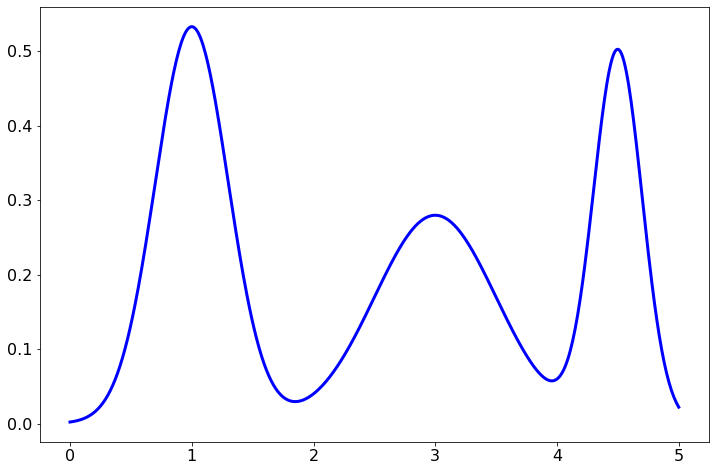

In [3]:
def tri_modal_pdf(x):
    # Define three Gaussian components with different means and standard deviations
    weights = np.array([0.4, 0.35, 0.25])  # Weights should sum to 1
    means = np.array([1, 3, 4.5])  # Peaks at 1, 3, and 4.5
    std_devs = np.array([0.3, 0.5, 0.2])  # Different spread for each mode
    
    # Compute the probability density function as a weighted sum of Gaussians
    pdf_values = sum(w * np.exp(-0.5 * ((x - m) / s) ** 2) / (s * np.sqrt(2 * np.pi)) 
                     for w, m, s in zip(weights, means, std_devs))
    
    # Normalize the density to integrate to 1 over [0,5]
    normalization_factor = np.trapz(pdf_values, x)
    return pdf_values / normalization_factor

x_min = 0
x_max = 5
num_samp = 500

x = np.linspace(x_min,x_max, num_samp)
pdf_values = tri_modal_pdf(x)

# Plot the PDF
plt.figure(figsize=(12, 8))
plt.plot(x, pdf_values, label='PDF', color='blue',linewidth=3)
ax = plt.gca()

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.savefig('trimodal_distribution.png', format='png', dpi=300)

plt.show()


### Diffusion Distances

On the real line, there is an explicit formula for the diffusion distance, which we'll use here.

We first define a function which produces pairwise exponential kernel values for a set of real numbers, depending on a positive number $t$.

In [4]:
def exponential_kernel(x,t):
    
    ## Input: x = list of real numbers, t = 'time' in the diffusion kernel
    ## Output: kernel distances between each pair of points
    
    dists = pairwise_distances(x.reshape(-1, 1))
    kernel = np.exp(-dists**2/(4*t))/(4*np.pi*t)**(1/2)
    
    return kernel

Next we define a function which produces pairwise diffusion distances for the set of real numbers, based on our explicit formula.

In [5]:
def explicit_pairwise_diffusion_distances(x,t):
    
    D = (2*(1/(8*np.pi*t)**(1/2) - exponential_kernel(x,2*t)))**(1/2)
    
    return D

### Fréchet variance for diffusion distances 

The following calculates the Fréchet variance function of the pdf above, with respect to diffusion distances at various values of $t$.   

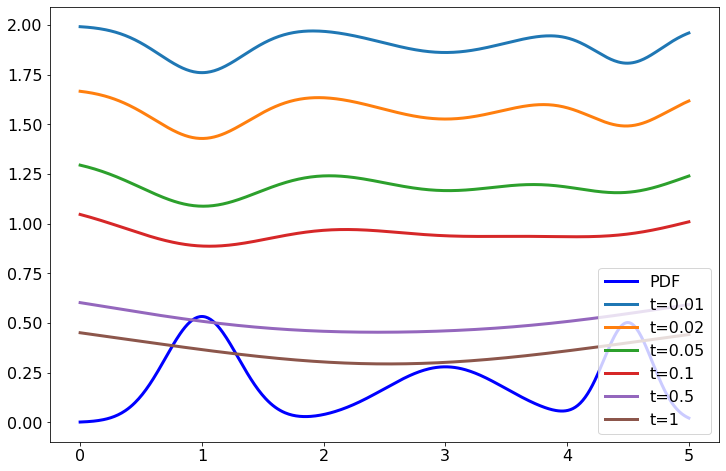

In [8]:
p = 2
ts = [0.01,.02,.05,.1,.5,1]

dx = (x_max - x_min)/num_samp

plt.figure(figsize=(12, 8))

plt.plot(x, pdf_values, label='PDF', color='blue',linewidth=3)

for t in ts:
    kernel = exponential_kernel(x,t)
    D = explicit_pairwise_diffusion_distances(x,t)
    mode_frechet_mean_values= np.sum(D**p*pdf_values*dx,axis = 1)**(1/p)
    plt.plot(x,mode_frechet_mean_values,label=f't={t}',linewidth=3)
    
ax = plt.gca()

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
    
plt.legend(loc = 'lower right',fontsize=16)
plt.savefig('frechet_modes.png', format='png', dpi=300)
plt.show()